In [1]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy

In [2]:
path = Path('C:/Users/NCC/Desktop/thesis/dataset/flowers')

In [3]:
tfms = aug_transforms(do_flip = True, 
                      flip_vert = False, 
                      mult=2.0)

dls = ImageDataLoaders.from_folder(path, 
                                   valid_pct=0.2, 
                                   seed=42, 
                                   item_tfms=Resize(128), 
                                   batch_tfms=tfms, 
                                   num_workers=0)

In [4]:
dls.valid_ds.items[:3]

[Path('C:/Users/NCC/Desktop/thesis/dataset/flowers/dandelion/7448453384_fb9caaa9af_n.jpg'),
 Path('C:/Users/NCC/Desktop/thesis/dataset/flowers/tulip/19695087459_dfb18ea181_n.jpg'),
 Path('C:/Users/NCC/Desktop/thesis/dataset/flowers/rose/5336562502_d697a3f0b2_n.jpg')]

In [5]:
print("Number of classes: ", dls.c)

Number of classes:  5


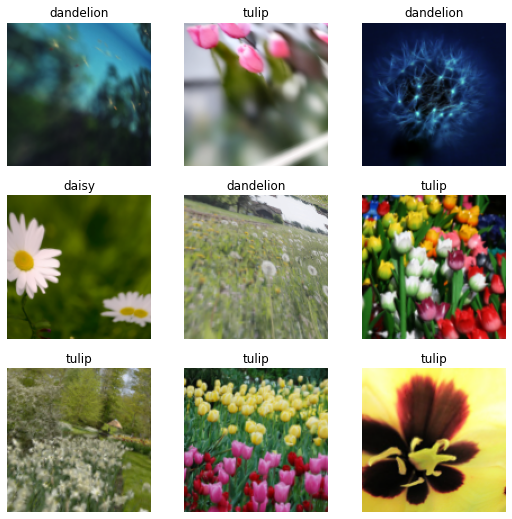

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet18, normalize=True, pretrained=True, metrics=[error_rate, accuracy])

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0030199517495930195)

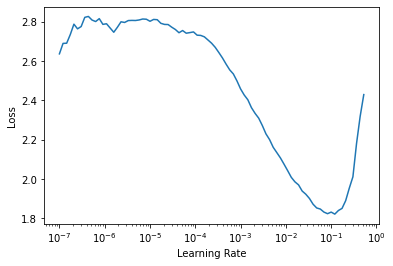

In [8]:
learn.lr_find()

In [9]:
print("Optimizer...")
learn.recorder.opt_func

Optimizer...


<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [10]:
print("Loss Function...")
learn.recorder.loss_func

Loss Function...


FlattenedLoss of CrossEntropyLoss()

In [11]:
lr = 0.012022644281387329
learn.fit_one_cycle(10,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.106374,0.678421,0.167824,0.832176,00:17
1,0.817813,0.438530,0.156250,0.843750,00:17
2,0.670956,0.408673,0.136574,0.863426,00:17
3,0.583857,0.373810,0.137731,0.862269,00:17
4,0.543512,0.408071,0.143519,0.856481,00:17
5,0.473552,0.340214,0.115741,0.884259,00:17
6,0.408809,0.315141,0.104167,0.895833,00:17
7,0.376708,0.269042,0.086806,0.913194,00:17
8,0.326711,0.260126,0.084491,0.915509,00:18
9,0.290625,0.262878,0.087963,0.912037,00:17


In [12]:
learn.save('flowers-resnet18-s1')

Path('C:/Users/NCC/Desktop/thesis/dataset/flowers/models/flowers-resnet18-s1.pth')

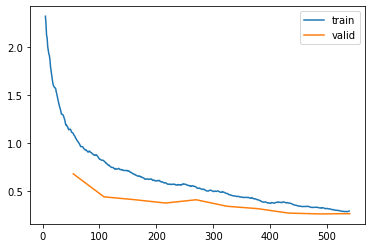

In [13]:
learn.recorder.plot_loss()

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

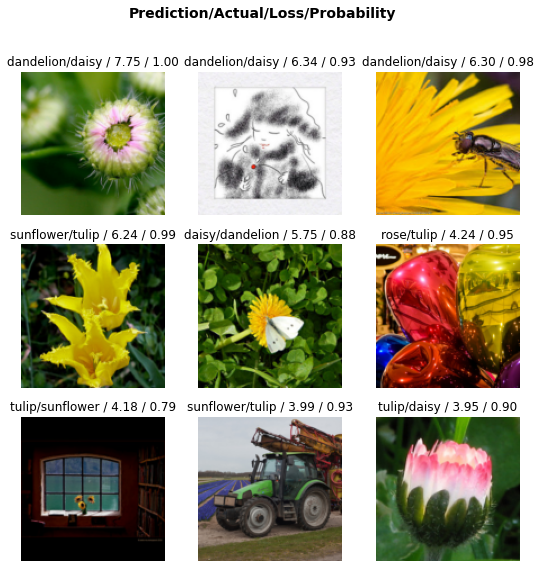

In [15]:
interp.plot_top_losses(9)

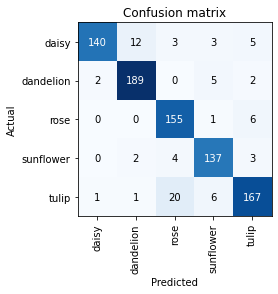

In [16]:
interp.plot_confusion_matrix(title='Confusion matrix')

In [17]:
interp.print_classification_report()

              precision    recall  f1-score   support

       daisy       0.98      0.86      0.92       163
   dandelion       0.93      0.95      0.94       198
        rose       0.85      0.96      0.90       162
   sunflower       0.90      0.94      0.92       146
       tulip       0.91      0.86      0.88       195

    accuracy                           0.91       864
   macro avg       0.91      0.91      0.91       864
weighted avg       0.91      0.91      0.91       864



In [18]:
learn.unfreeze()

SuggestedLRs(lr_min=6.30957365501672e-06, lr_steep=2.2908675418875646e-06)

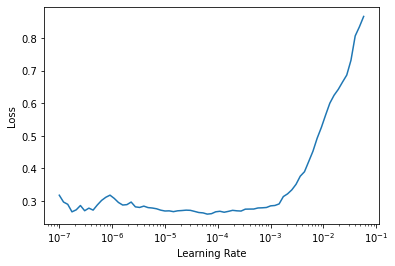

In [19]:
learn.lr_find()

In [23]:
learn.fit_one_cycle(10, lr_max=slice(6e-6, 3e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.287855,0.271675,0.087963,0.912037,00:18
1,0.293897,0.285448,0.092593,0.907407,00:18
2,0.302768,0.270937,0.091435,0.908565,00:18
3,0.284037,0.246961,0.076389,0.923611,00:18
4,0.245930,0.252019,0.082176,0.917824,00:18
5,0.213985,0.242149,0.072917,0.927083,00:18
6,0.188473,0.249971,0.074074,0.925926,00:18
7,0.159300,0.214478,0.068287,0.931713,00:18
8,0.144250,0.224298,0.074074,0.925926,00:18
9,0.141367,0.222091,0.070602,0.929398,00:18


In [24]:
learn.save('flowers-resnet18-s2')

Path('C:/Users/NCC/Desktop/thesis/dataset/flowers/models/flowers-resnet18-s2.pth')

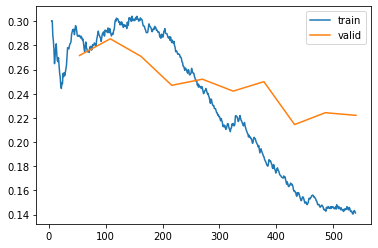

In [25]:
learn.recorder.plot_loss()

In [26]:
interp1 = ClassificationInterpretation.from_learner(learn)

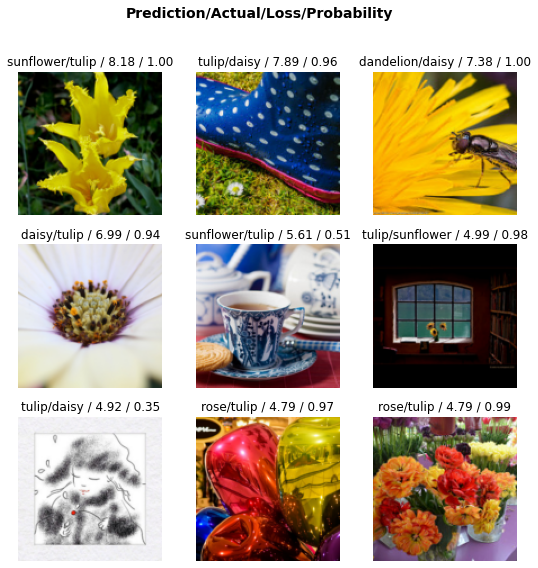

In [27]:
interp1.plot_top_losses(9)

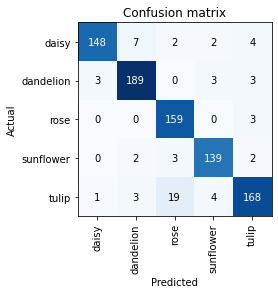

In [28]:
interp1.plot_confusion_matrix(title='Confusion matrix')

In [29]:
interp1.print_classification_report()

              precision    recall  f1-score   support

       daisy       0.97      0.91      0.94       163
   dandelion       0.94      0.95      0.95       198
        rose       0.87      0.98      0.92       162
   sunflower       0.94      0.95      0.95       146
       tulip       0.93      0.86      0.90       195

    accuracy                           0.93       864
   macro avg       0.93      0.93      0.93       864
weighted avg       0.93      0.93      0.93       864

